In [41]:
import requests
import pandas as pd 
from pandas.io.json import json_normalize

url = "https://sdg-market.oniabsis.com/api/v1/contributions"
try:
    r = requests.get(url)
except requests.ConnectionError:
    print("Connection failed")

In [42]:
r.headers

{'Server': 'nginx/1.10.3', 'Date': 'Wed, 28 Nov 2018 18:52:51 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Cache-Control': 'no-cache, private'}

In [43]:
#the json data recieved has many levels json_normalize flattens this structure
df = json_normalize(r.json())
df.columns

Index(['calculation_utc_datetime', 'commit_date', 'commit_id',
       'committer_email', 'committer_username', 'git_project.active',
       'git_project.git_address', 'git_project.id', 'git_project.name',
       'git_project.project_address', 'git_project.project_value', 'id',
       'transaction.from_user', 'transaction.id', 'transaction.nb_sdg',
       'transaction.nb_tokens', 'transaction.project.active',
       'transaction.project.git_address', 'transaction.project.id',
       'transaction.project.name', 'transaction.project.project_address',
       'transaction.project.project_value', 'transaction.sell_offer',
       'transaction.to_user', 'transaction.to_user.access_token',
       'transaction.to_user.active', 'transaction.to_user.black_listed',
       'transaction.to_user.email', 'transaction.to_user.github_id',
       'transaction.to_user.id', 'transaction.to_user.name',
       'transaction.to_user.roles', 'transaction.to_user.timezone',
       'transaction.to_user.username', 

## Important to note perhaps user don't want their emails shared so drop that column before anything...

In [44]:
# The list of fetures we are actually going to use the other categorical values can be used as hues
plotlist = ['commit_date', 'git_project.project_value','transaction.nb_tokens']
df[plotlist].sample(5)

,commit_date,git_project.project_value,transaction.nb_tokens
124,2018-09-20T08:49:21+00:00,16175,443.23
47,2018-09-20T08:49:57+00:00,15055,511.34
104,2018-10-16T06:46:22+00:00,16175,147.04
131,2018-09-13T12:40:52+00:00,16175,31.86
93,2018-10-22T09:51:42+00:00,16175,245.75


In [45]:
# The projects and commmitters
df['committer_username'].dropna().unique()

array(['gilles-hemmerle', 'ndoulgeridis', 'ashiqur-rony'], dtype=object)

In [46]:
df['git_project.name'].unique()

array(['SDG Market (API)', 'SDG Market (frontend)'], dtype=object)

In [47]:
import matplotlib as plt
import seaborn as sns

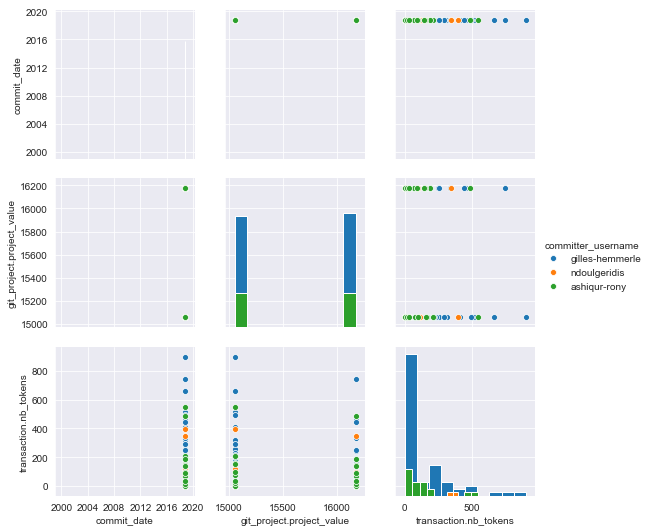

In [48]:
from datetime import date
df['commit_date'] = pd.to_datetime(df['commit_date'])

sns.pairplot(df, vars=plotlist, hue='committer_username', diag_kind='hist')

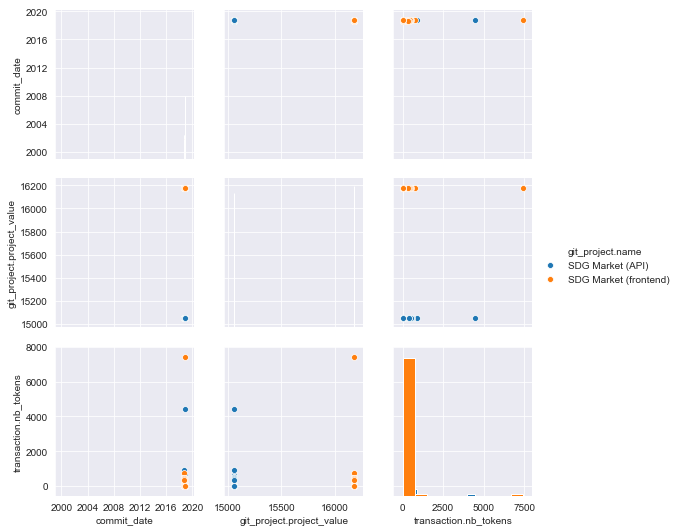

In [49]:
sns.pairplot(df, vars=plotlist, hue='git_project.name', diag_kind='hist')

### Let me plot the dates separately since they are not really evident to see in the pairplot

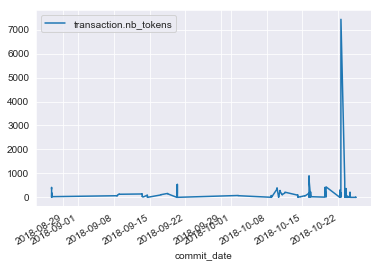

In [50]:
df[['commit_date', 'transaction.nb_tokens']].set_index('commit_date').plot()

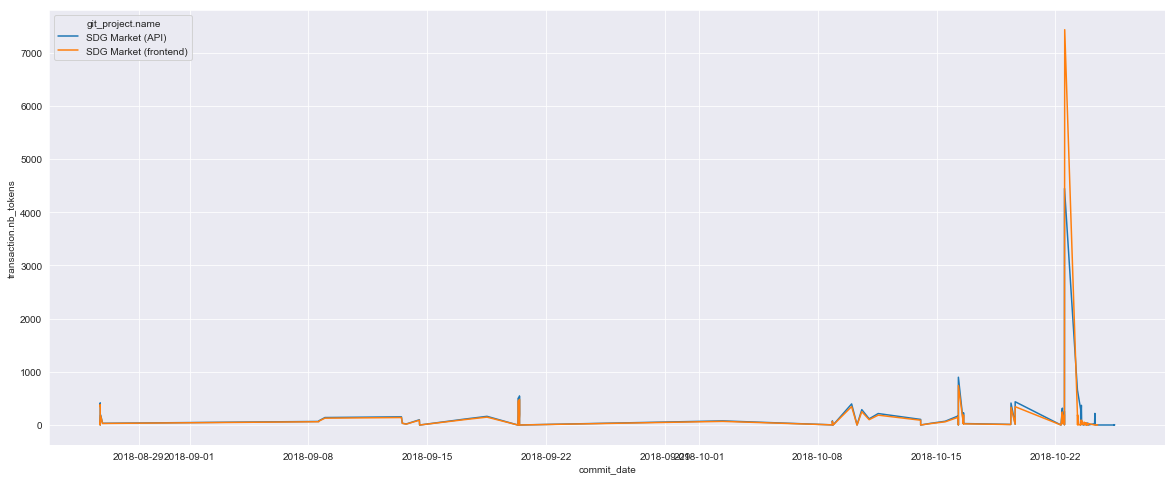

In [51]:
sns.set_style('darkgrid')
plt.pyplot.figure(figsize=(20,8))
sns.lineplot(x='commit_date', y='transaction.nb_tokens', data=df, hue='git_project.name')

c:\users\xoeseko\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


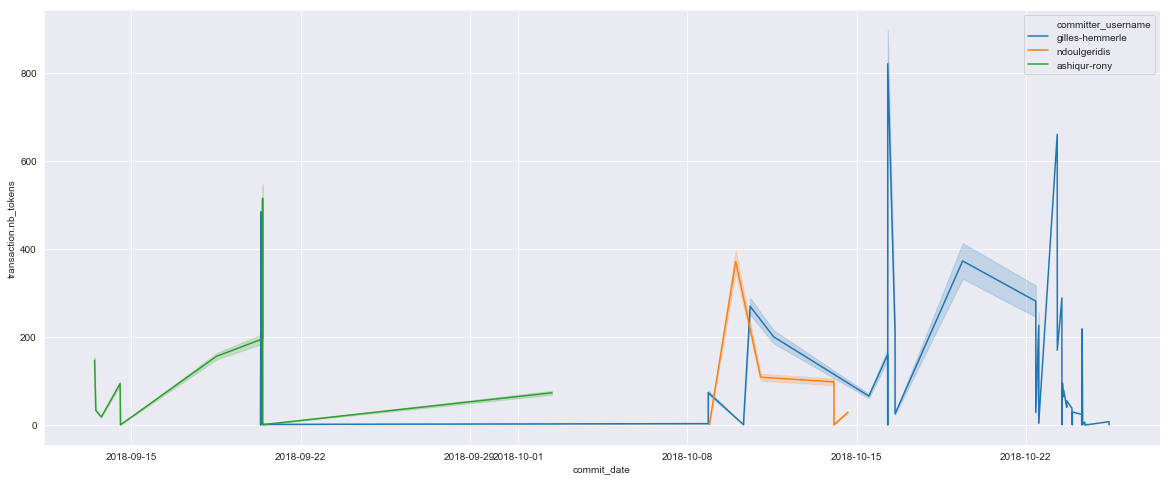

In [52]:
plt.pyplot.figure(figsize=(20,8))
sns.lineplot(x='commit_date', y='transaction.nb_tokens', data=df, hue='committer_username')